<h1>Introduction</h1>
Lending Club is an online marketplace that matches borrowers and investors. The system will require borrowers to answer many information, including the purpose of loan, total amount requested, FICO score, payment term of 36 months or 60 months... then it will output an interest rate of that loan amount. Investors will approve the loan that ensure the return. We want to build a model for this lending system.

<h2>Prepare data</h2>

Build a model to know how much interest rate a borrower need to pay with 2 inputs: Loan amount and FICO score

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [33]:
df = pd.read_csv(open('loansData.csv','rb'))
df.head()
# df.isnull().sum()

,id,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.months,Employment.Length
0,81174,20000,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1
1,99592,19200,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,80059,35000,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,15825,10000,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,33182,12000,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9


In [34]:
df.describe()

,id,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.months
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2499.000000,2498.000000,2498.000000,2498.000000
mean,51631.597200,12406.500000,12001.573236,13.066996,41.260800,15.377512,5688.931321,10.075661,15244.559648,0.906325
std,30053.345508,7801.544872,7745.320754,4.178230,9.930893,7.504959,3963.118185,4.508644,18308.549795,1.231036
min,10.000000,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000
25%,26523.000000,6000.000000,6000.000000,10.160000,36.000000,9.747500,3500.000000,7.000000,5585.750000,0.000000
50%,50653.000000,10000.000000,10000.000000,13.110000,36.000000,15.320000,5000.000000,9.000000,10962.000000,0.000000
75%,77580.500000,17000.000000,16000.000000,15.800000,36.000000,20.672500,6800.000000,13.000000,18888.750000,1.000000
max,104202.000000,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,270800.000000,9.000000


In [35]:
df[df['Amount.Funded.By.Investors']<0]

,id,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.months,Employment.Length
401,102441,7500,-0.01,12.29,36,educational,21.34,CA,MORTGAGE,8750.00,685-689,14.0,20947.0,7.0,5
1632,102444,2200,-0.01,13.87,36,credit_card,10.35,NJ,RENT,3333.33,640-644,10.0,11606.0,1.0,3


We will select column Amount.Requested, and create average FICO score as 2 parameters for the model

In [36]:
data = df[['Interest.Rate', 'FICO.Range', 'Amount.Requested']]
data = data.rename(columns={'FICO.Range': 'fico', 'Amount.Requested': 'amount', 'Interest.Rate': 'interest'})
data['fico_avr'] = (pd.to_numeric(data.fico.str.split("-").str[0]) + pd.to_numeric(data.fico.str.split("-").str[1]))/2
# data.drop('fico', axis = 1, inplace=True)
data.head()


,interest,fico,amount,fico_avr
0,8.90,735-739,20000,737.0
1,12.12,715-719,19200,717.0
2,21.98,690-694,35000,692.0
3,9.99,695-699,10000,697.0
4,11.71,695-699,12000,697.0


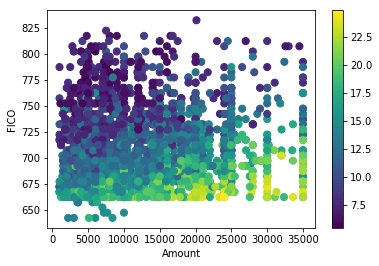

In [37]:
fig, ax = plt.subplots()
scat = ax.scatter(data['amount'].values.reshape(data.shape[0],1),data.fico_avr, c=data.interest, marker='o',s=50)
fig.colorbar(scat)
ax.set_xlabel('Amount')
ax.set_ylabel('FICO')
plt.show()

From the plot, we can conclude that the interest rate will decrease if borrower has higher score, and the interest rate is directly proportional with the amount of loan.

<h2> Linear Model </h2>

We will use linear regression function to model the interest rate of borrower

In [38]:
X = data[['amount','fico_avr']]
y = data['interest']
lg=linear_model.LinearRegression()
model1=lg.fit(X,y)
print ("formula: y = {0}x + {1}".format(model1.coef_, model1.intercept_))

formula: y = [ 0.00021075 -0.08844242]x + 73.0596831611274


Evaluate model

Mean squared error: 5.99


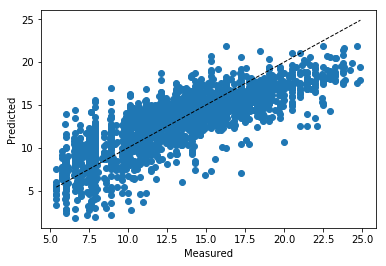

In [39]:
pred=model1.predict(X)
print("Mean squared error: %.2f"
      % np.mean((pred - y) ** 2))
#################################################
predicted = cross_val_predict(lg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

A person with FICO score 750 and want to request a loan amount $10,000. From the above model, we can know the interest rate he need to pay monthly.

In [40]:
model1.predict([10000,750])

C:\Users\a16508\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 8.83534421])

We can see the interest rate is 8.8, < 12%.

<h2>Logistic function</h2>
We will build a logistic function to know the probability that this person can get an interest rate <= 12%. 
We will add a new columns with 2 values. 1 if interest rate <= 12% and 0 otherwise

In [41]:
data['good_interest'] = 1
data['good_interest'][data['interest'] > 12] = 0
data.head()

C:\Users\a16508\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,interest,fico,amount,fico_avr,good_interest
0,8.90,735-739,20000,737.0,1
1,12.12,715-719,19200,717.0,0
2,21.98,690-694,35000,692.0,0
3,9.99,695-699,10000,697.0,1
4,11.71,695-699,12000,697.0,1


In [42]:
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)
X = train[['amount','fico_avr']]
y = train['good_interest']
X_test = test[['amount','fico_avr']]
y_test = test['good_interest']
# train.good_interest.value_counts()
# test.good_interest.value_counts()

In [43]:
logistic=linear_model.LogisticRegression(C=1)
model = logistic.fit(X,y)
print("modelcoef: %s. model intercept: %s" % (model.coef_,model.intercept_))
model


modelcoef: [[ -7.61669093e-05   7.13658409e-04]]. model intercept: [-0.00052151]


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y=data.good_interest
predicted = cross_val_predict(logistic, X_test, y_test, cv=10)
print (classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.63      0.68      0.65       435
          1       0.50      0.45      0.47       315

avg / total       0.58      0.58      0.58       750



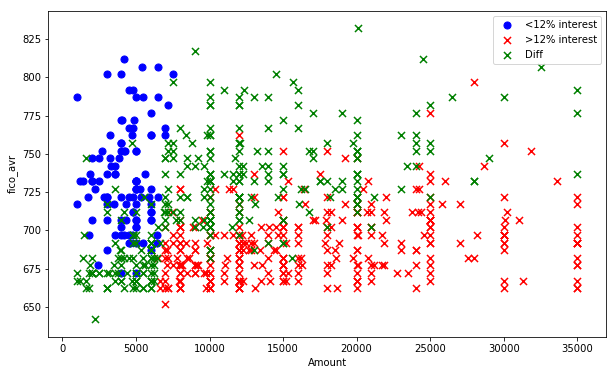

In [45]:
test['predict']=model.predict(test[['amount','fico_avr']])
test['pos_diff']=test['good_interest']+test['predict']
predict_positive = test[test['pos_diff'].isin([2])]  
predict_negative = test[test['pos_diff'].isin([0])]
predict_diff=test[test['pos_diff'].isin([1])]

fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(predict_positive['amount'], predict_positive['fico_avr'], s=50, c='b', marker='o', label='<12% interest')  
ax.scatter(predict_negative['amount'], predict_negative['fico_avr'], s=50, c='r', marker='x', label='>12% interest')  
ax.scatter(predict_diff['amount'], predict_diff['fico_avr'], s=50, c='g', marker='x', label='Diff')  
ax.legend()  
ax.set_xlabel('Amount')  
ax.set_ylabel('fico_avr') 
plt.show()

The f-score for "1" prediction is lower than 50%. There are many green cross (differences between predicted result and real result) in above plot. 

In [46]:
model.predict([[10000,750]])

array([0], dtype=int64)

In [47]:
model.predict_proba([[10000,750]])[:,1]

array([ 0.44350557])

probability of getting value 1 (intereset rate < 12%) is 0.44

Another way, We can use Sigmoid function to calculate probability of the linear regression model.

In [48]:
x = np.array([1,10000,750])
theta = np.concatenate([model.intercept_, model.coef_[0]], axis = 0)
freq = 1 / (1 + np.exp(-1 * np.dot(theta, x)))
print ("For a loan with amount 10,000 and fico score 750," )
print("we predict an interest < 12% probability of" , freq.astype(str))


For a loan with amount 10,000 and fico score 750,
we predict an interest < 12% probability of 0.44350557042416455


<h1> Conclusion </h1>
Even though the linear regression model shows that a person having a FICO score of 750, can make a loan of $10,000 with interest rate < 12%, the logistic function calculate the probability to get the loan is 44.35%, < 70%. I predict this person cannot obtain the loan.